In [13]:
from sklearn.ensemble import RandomForestClassifier
from collections import deque
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('creditcard.csv')
df = pd.DataFrame(data)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
def create_datastream(data, batch_size):
    return [data.iloc[i:i+batch_size] for i in range(0, len(data), batch_size)]

In [16]:
df = df.drop(columns=['Time'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
def train_random_forest_classifier(X, y, n_estimators=50):
    """
    Huấn luyện bộ phân loại Random forest trên dữ liệu X, y.
    n_estimators: Số lượng cây trong Random forest.
    """
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X, y)
    return rf
    

In [18]:
def adaptive_ensemble_size(C, sample, unique_label, anpha, min_num=3):
    """
    Cơ chế adaptive_esemble 
    C : Bộ phân loại yếu
    sample
    unique_label : Tập hợp nhãn trong luồng dữ liệu
    anpha : hyper parameter
    min_num : số lượng C tối thiểu 
    """
    probability_list = []
    # Tính toán xác suất dự đoán cho mỗi bộ phân loại trong C và lưu trữ kết quả
    sample_proba = [clf.predict_proba(sample)[0] for clf in C]
    
    for label in unique_label:
        li = []
        latest_proba = None
        
        for proba in sample_proba:
            # Tạo từ điển để ánh xạ nhãn với xác suất tương ứng
            probability_dict = {lbl: prob for lbl, prob in zip(C[0].classes_, proba)}
            # Lấy xác suất hiện tại cho nhãn đang xét
            current_proba = probability_dict.get(label, 0)
            
            if len(li) < min_num:
                # Nếu số lượng xác suất trong li nhỏ hơn min_num, thêm current_proba vào li
                li.append(current_proba)
            else:
                if latest_proba is None:
                    # Nếu latest_proba chưa được gán giá trị, gán giá trị của nó bằng xác suất mới nhất
                    latest_proba = probability_dict.get(label, 0)
                
                # So sánh xác suất hiện tại với xác suất mới nhất
                if abs(current_proba - latest_proba) < anpha:
                    # Nếu chênh lệch nhỏ hơn anpha, thêm current_proba vào li
                    li.append(current_proba)
                else:
                    # Nếu chênh lệch lớn hơn anpha, dừng vòng lặp
                    break
        
        # Thêm danh sách xác suất cho nhãn hiện tại vào probability_list
        probability_list.append(li)
    
    return probability_list

In [19]:
def linear_regression(x, y):
    """Tính hồi quy tuyến tính"""
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

def tendency_prediction(probability_list, Y, epsilon=0.01):
    """
    Thực hiện cơ chế dự đoán xu hướng
    Input:
    - probability_list: Danh sách xác suất cho mỗi mẫu
    - Y: Danh sách các lớp trong luồng dữ liệu
    - epsilon: Hệ số trọng số (mặc định là 0.01)
    Output:
    - Ps: Lớp dự đoán cho mẫu
    """
    predicted_probabilities = []
    
    for i, li in enumerate(probability_list):
        x = np.arange(1, len(li) + 1)
        y = np.array(li[::-1])
        slope, intercept = linear_regression(x, y)
        next_value = slope * (len(li) + 2) + intercept
        li = [next_value] + li  # Thêm giá trị dự đoán tiếp theo vào đầu danh sách
        weights = 1 - np.arange(1, len(li) + 1) * epsilon
        weighted_prob = np.dot(li, weights) / len(li)
        predicted_probabilities.append(weighted_prob)
    
    Ps = Y[np.argmax(predicted_probabilities)]
    
    return Ps


Precision: 0.998393638894171
Recall: 0.9983910498132404
F1-Score: 0.9977058407670324
Accuracy: 0.9983910498132404


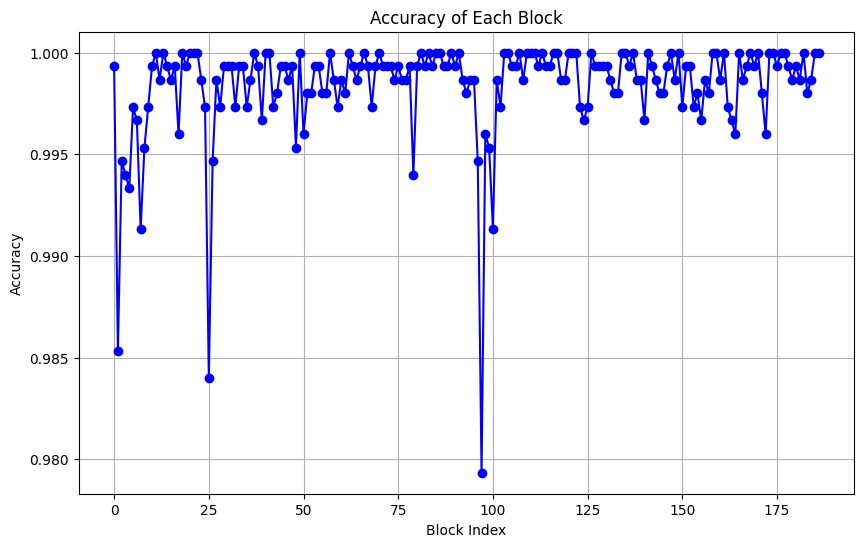

In [20]:
def process_data_stream(S, m, k, unique_labels):
    C = deque(maxlen=m)
    true_labels = []
    predicted_labels = []
    pre = []
    block_accuracies = []  # Danh sách để lưu trữ độ chính xác của từng block

    for i in range(len(S) - 1):
        Bi = S[i]
        block_predictions = []
        X = Bi.iloc[:, :-1]
        y = Bi.iloc[:, -1]
        Ci = train_random_forest_classifier(X, y)
        C.append(Ci)
        if len(C) < k:
            continue
        Bi_1 = S[i + 1]
        for index, row in Bi_1.iterrows():
            sample = pd.DataFrame([row[:-1]], columns=Bi.columns[:-1])
            anpha = (1500 / len(Bi_1)) * 0.2
            selected_classifiers = adaptive_ensemble_size(C, sample, unique_labels, anpha)
            pre_sample = tendency_prediction(selected_classifiers, unique_labels)
            block_predictions.append(pre_sample)
            true_labels.append(row.iloc[-1])
            predicted_labels.append(pre_sample)
        pre.append(block_predictions)

        # Tính toán độ chính xác cho block hiện tại
        block_accuracy = accuracy_score(true_labels[-len(Bi_1):], predicted_labels[-len(Bi_1):])
        block_accuracies.append(block_accuracy)
    
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"Accuracy: {accuracy}")

    # Trực quan hóa độ chính xác của từng block
    plt.figure(figsize=(10, 6))
    plt.plot(block_accuracies, marker='o', linestyle='-', color='b')
    plt.title('Accuracy of Each Block')
    plt.xlabel('Block Index')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# Main execution
batch_size = 1500
S = create_datastream(df, batch_size)
m = 15
k = 3
unique_labels = list(set(df.iloc[:, -1]))
process_data_stream(S, m, k, unique_labels)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Tải và chuẩn bị dữ liệu
data = load_iris()
X, y = data.data, data.target

# 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Huấn luyện và đánh giá IncrementalSGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)

# 4. Huấn luyện và đánh giá RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# 5. So sánh kết quả
print(f"IncrementalSGDClassifier Accuracy: {sgd_accuracy}")
print(f"RandomForestClassifier Accuracy: {rf_accuracy}")